In [12]:
import torch
from fastai.data.all import *
from fastai.vision.all import *
from patchify import patchify
from PIL import Image
import optuna
from optuna.integration import FastAIPruningCallback
import optuna.visualization as vs

# from odyssey_losses.dice_loss import TverskyLoss

In [2]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

def test_loss(loss_func):
    learn = unet_learner(dls, resnet34, loss_func = loss_func)
    learn.fine_tune(8)
    learn.recorder.plot_loss()

epoch,train_loss,valid_loss,time
0,0.807040,0.724373,00:01


epoch,train_loss,valid_loss,time
0,0.729365,0.724373,00:01
1,0.729648,0.724373,00:01
2,0.729594,0.724373,00:01
3,0.729559,0.724373,00:01
4,0.729495,0.724373,00:01
5,0.729732,0.724373,00:01
6,0.729694,0.724373,00:01
7,0.729736,0.724373,00:01


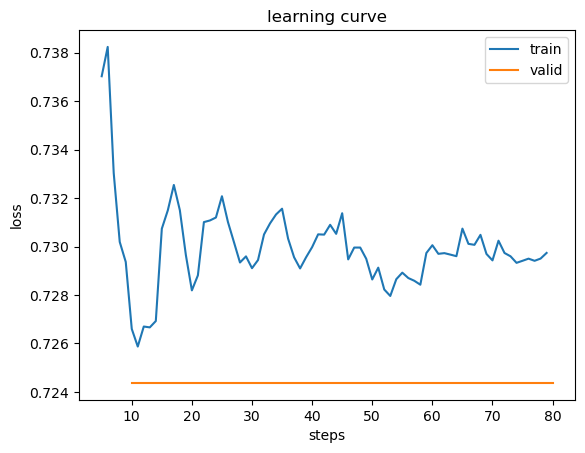

In [17]:
class CombinedLoss:
    "Dice and Focal combined"
    def __init__(self, axis=1, smooth=1., alpha=1.):
        store_attr()
        self.focal_loss = FocalLossFlat(axis=axis)
        self.dice_loss =  DiceLoss(axis, smooth)
        
    def __call__(self, pred, targ):
        return self.focal_loss(pred, targ) + self.alpha * self.dice_loss(pred, targ)
    
    def decodes(self, x):    return x.argmax(dim=self.axis)
    def activation(self, x): return F.softmax(x, dim=self.axis)

#loss_func = CombinedLoss()
loss_func = BaseLoss(DiceLoss) # neeeeeeeeeds to be flattened!! That's what the model expects!!
test_loss(loss_func)


# straaaaaaaaaange tomfoolery is afoot!!

In [ ]:
# very, very strange.